<a href="https://colab.research.google.com/github/rodrigossilveira/DS_projects/blob/main/Airbnb_Berlim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyshp

     |████████████████████████████████| 44 kB 1.4 MB/s 


In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 4.7 MB/s 
     |████████████████████████████████| 16.7 MB 311 kB/s 
     |████████████████████████████████| 6.3 MB 58.6 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shapefile as shp
import geopandas as gpd

In [ ]:
sns.set(style="whitegrid", palette="pastel", color_codes=True) 
sns.mpl.rc("figure", figsize=(10,6))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Colab_Data/Berlim Airbnb/listings.csv')
data.head()

Mounted at /content/drive


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,2018-08-16,0.39,1,297
4,7071,BrightRoom with sunny greenview!,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,2018-11-04,1.75,1,26


In [ ]:
data.dropna(axis = 0, inplace = True)
data.head(-5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,2018-08-16,0.39,1,297
4,7071,BrightRoom with sunny greenview!,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,2018-11-04,1.75,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22398,29710765,Sweet Apartment,94600023,Balcinoiu,Mitte,Moabit Ost,52.520459,13.353899,Entire home/apt,45,2,1,2018-11-04,1.00,2,10
22401,29721020,Sunny big accommodation in the heart of Berlin,115790786,Pascal / Dennis,Friedrichshain-Kreuzberg,Südliche Friedrichstadt,52.499102,13.387916,Entire home/apt,170,1,1,2018-11-04,1.00,6,38
22418,29732182,Gästezimmer im Herzen Berlins,223679612,Jens,Mitte,Regierungsviertel,52.520733,13.390644,Private room,50,2,1,2018-11-03,1.00,1,335
22424,29740105,Best view and position Berlins,219112856,Diego,Friedrichshain-Kreuzberg,Südliche Friedrichstadt,52.502774,13.383546,Entire home/apt,62,1,1,2018-11-04,1.00,4,126


No handles with labels found to put in legend.


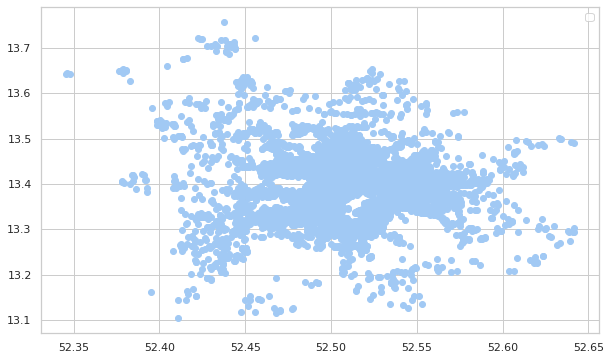

In [ ]:
img = plt.imread("https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Karte_ubahn_berlin.png/640px-Karte_ubahn_berlin.png")
fig, ax = plt.subplots()
#ax.imshow(img)
ax.scatter(x = data['latitude'], y = data['longitude'], )
#data.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)
plt.legend()
plt.show()

In [ ]:
print(data['latitude'].max(),data['latitude'].min(), data['longitude'].max(),data['longitude'].min())

52.64149886682099 52.345803084754245 13.757641993029836 13.103556747971687


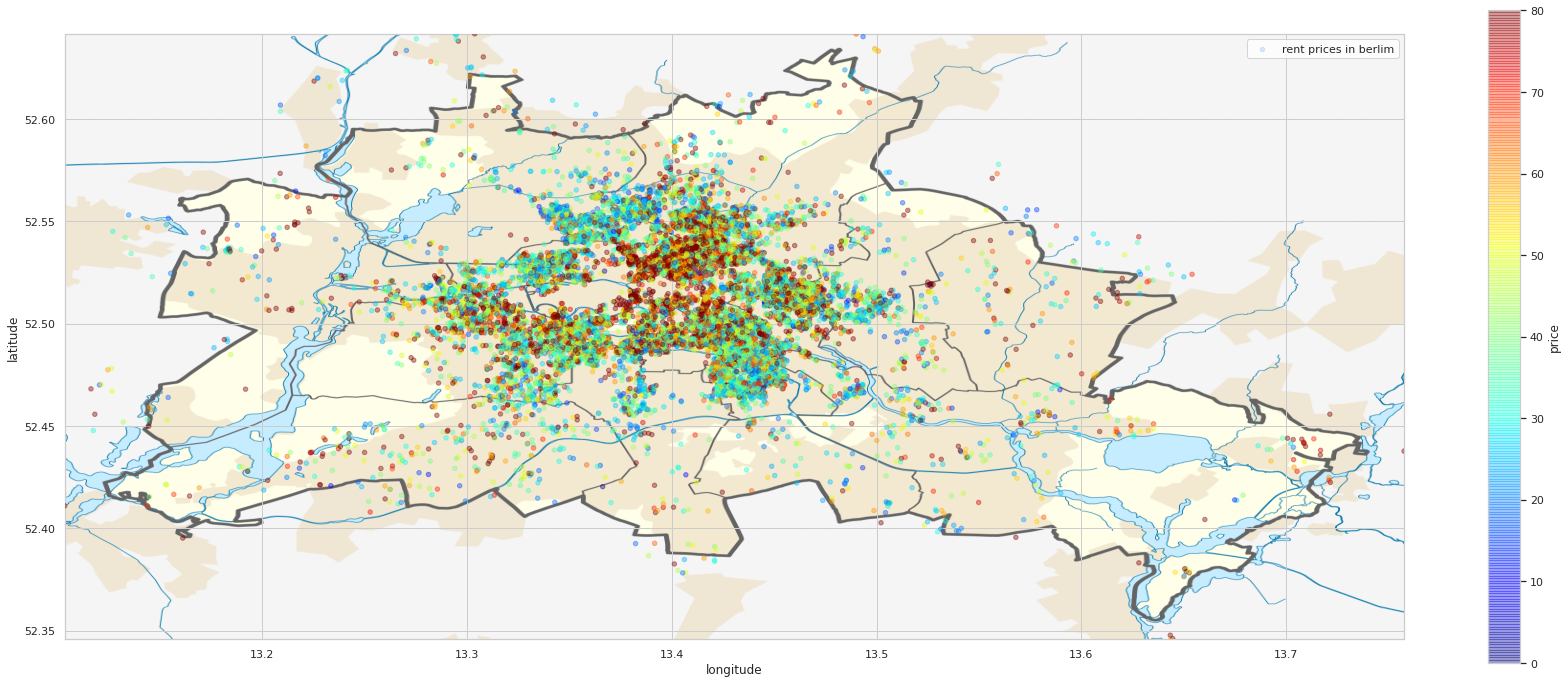

In [ ]:
import urllib
plt.figure(figsize=(30,12))
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/thumb/c/c0/Berlin_location_map.svg/1400px-Berlin_location_map.svg.png')
nyc_img=plt.imread(i)
plt.imshow(nyc_img,zorder=0,extent=[13.103556747971687,13.757641993029836, 52.345803084754245, 52.64149886682099])
ax=plt.gca()
data.plot(kind='scatter', x='longitude', y='latitude',label = 'rent prices in berlim' ,c='price', ax=ax, 
           cmap=plt.get_cmap('jet'),vmax = 80 , colorbar=True, alpha=0.4, zorder=5)
plt.legend()
plt.show()

In [ ]:
data['neighbourhood_group'] = data['neighbourhood_group'].astype('category')
data['room_type'] = data['room_type'].astype('category')
cat_columns = data.select_dtypes(['category']).columns
data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)
data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,4,Brunnenstr. Süd,52.534537,13.402557,0,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,6,Prenzlauer Berg Nordwest,52.548513,13.404553,1,17,2,6,2018-10-01,1.42,1,0
2,3176,Fabulous Flat in great Location,3718,Britta,6,Prenzlauer Berg Südwest,52.534996,13.417579,0,90,62,143,2017-03-20,1.25,1,220
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,10,Schöneberg-Nord,52.498855,13.349065,1,26,5,25,2018-08-16,0.39,1,297
4,7071,BrightRoom with sunny greenview!,17391,Bright,6,Helmholtzplatz,52.543157,13.415091,1,42,2,197,2018-11-04,1.75,1,26


In [ ]:
data.select_dtypes(['object']).columns

Index(['name', 'host_name', 'neighbourhood', 'last_review'], dtype='object')

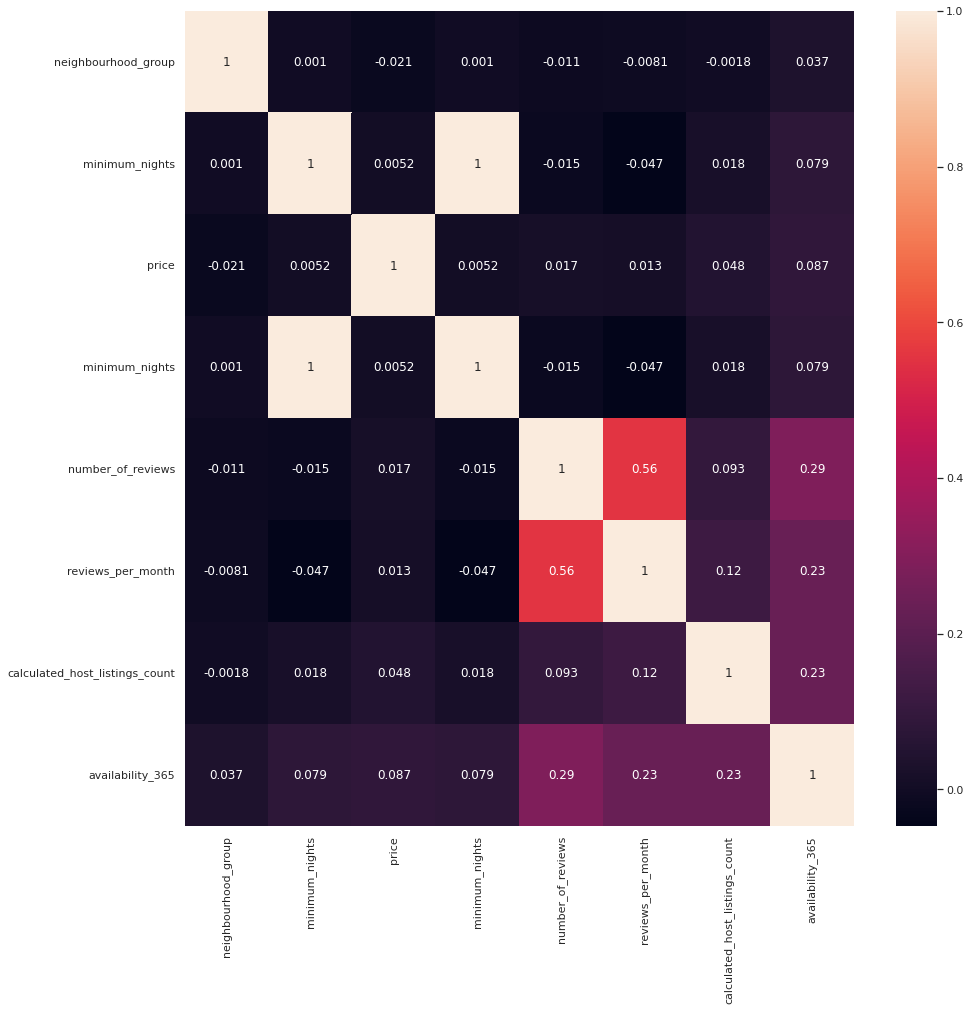

In [ ]:
corr_data = data.loc[:,['neighbourhood_group','minimum_nights','price','minimum_nights','number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count','availability_365']]
corrMatrix = corr_data.corr()
fig, ax = plt.subplots(figsize=(15,15)) 
ax = sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
q1 = data['price'].quantile(0.25)
q3 = data['price'].quantile(0.75)
iqr = q3 - q1
outliers= data.loc[data['price'] > q3+(1.5*iqr)]
print(iqr)

print(q3+(1.5*iqr))

40.0
130.0


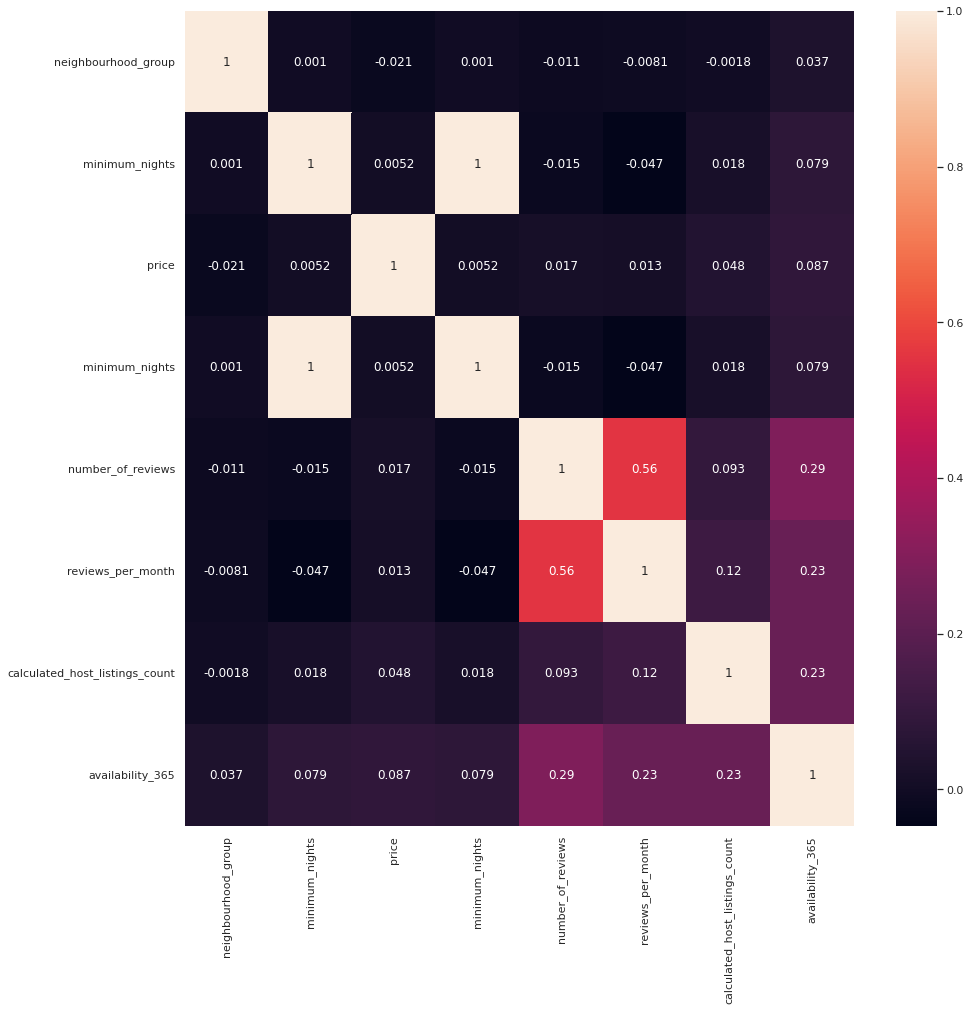

In [ ]:
data_without_outliers = data.loc[data['price'] <= q3+(1.5*iqr)]
corrMatrix = corr_data.corr()
fig, ax = plt.subplots(figsize=(15,15)) 
ax = sns.heatmap(corrMatrix, annot=True)
plt.show()

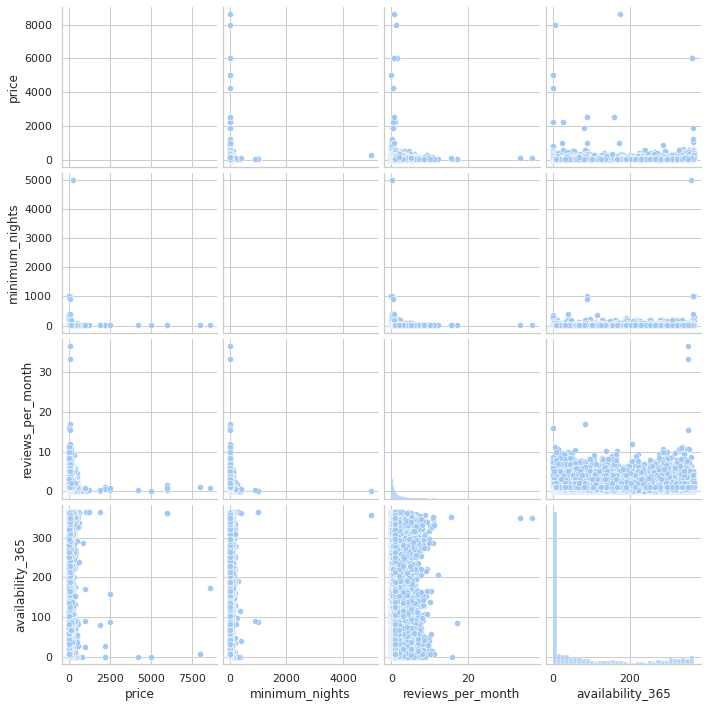

In [ ]:
columns_pairplot = ['price','minimum_nights','reviews_per_month', 'availability_365']
sns.pairplot(data[columns_pairplot])
plt.show()

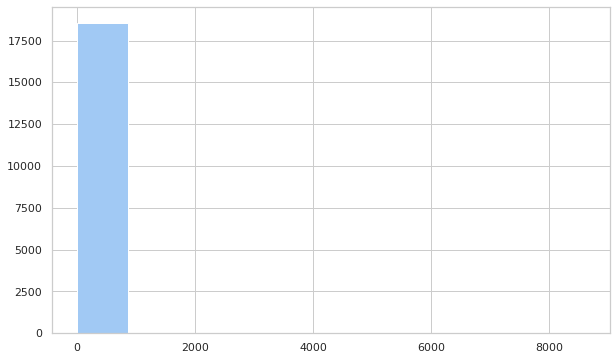

In [ ]:
data['price'].hist( )